# Features data analysis with Machine Learning and Visualization Techniques

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib.cm import get_cmap
import os

# Data loading 

In [39]:
df = pd.read_csv("./data/object_features_S_III_c2.csv")
df = df[df["entropy"]>-6]


In [45]:
print(df.columns)

Index(['label', 'volume_um3', 'mean_intensity', 'max_intensity',
       'intensity_std', 'entropy'],
      dtype='object')


Choose columns we need for the analysis: 

In [46]:
df.head()

,label,volume_um3,mean_intensity,max_intensity,intensity_std,entropy
0,1,0.470880,72.388991,206.0,51.560164,8.536447
1,2,0.429408,70.790744,200.0,45.350640,8.561858
2,3,0.567216,62.014471,189.0,47.815531,8.944075
3,4,0.847152,43.723100,200.0,42.535072,7.840651
4,5,0.438912,65.217520,198.0,50.954481,8.622922


In [47]:
df.describe()

,label,volume_um3,mean_intensity,max_intensity,intensity_std,entropy
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.734884,0.312329,31.756057,81.581395,17.723935,12.636232
std,187.687983,0.295486,10.947002,35.366295,8.358084,2.402931
min,1.000000,0.003024,10.391045,24.000000,3.690384,-2.405277
25%,164.000000,0.137808,23.741525,56.000000,11.894535,11.623053
50%,325.000000,0.223344,29.471857,74.000000,15.987602,13.089250
75%,486.000000,0.385776,38.558140,101.000000,22.193302,14.260624
max,658.000000,2.830896,87.428571,214.000000,51.560164,16.078926


In [48]:
df = df[['label', 'volume_um3', 'mean_intensity', 'max_intensity', 'intensity_std', 'entropy']] #'total_intensity', 'background_corrected_intensity'

# K-Means

In [49]:
# Features 
X = df[['volume_um3', 'mean_intensity', 'max_intensity', 'intensity_std', 'entropy']] #'total_intensity', 'background_corrected_intensity'
# Standardize
X_scaled = StandardScaler().fit_transform(X)

In [50]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

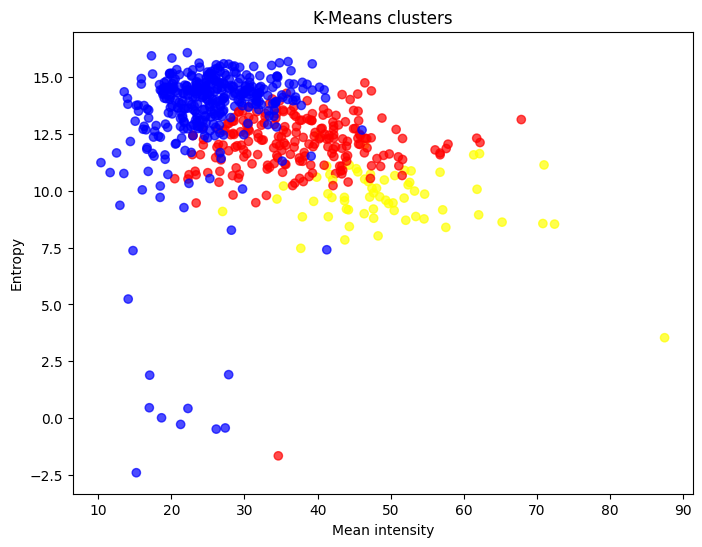

In [51]:
colors = ['red', 'blue', 'yellow']
cluster_colors = df['cluster'].map(lambda x: colors[x])
plt.figure(figsize=(8, 6))
plt.scatter(df["mean_intensity"], df["entropy"], c=cluster_colors, alpha=0.7)
plt.xlabel("Mean intensity")
plt.ylabel("Entropy")
plt.title("K-Means clusters")
plt.show()

### PCA 

In [52]:
y = df['cluster']
X = df[['volume_um3', 'mean_intensity', 'max_intensity', 'intensity_std', 'entropy']] #'total_intensity', 'background_corrected_intensity'

In [53]:
# Standarization 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# PCA
pca = PCA(n_components=2)  # Redukcja do 2 wymiarów
X_pca = pca.fit_transform(X_scaled)

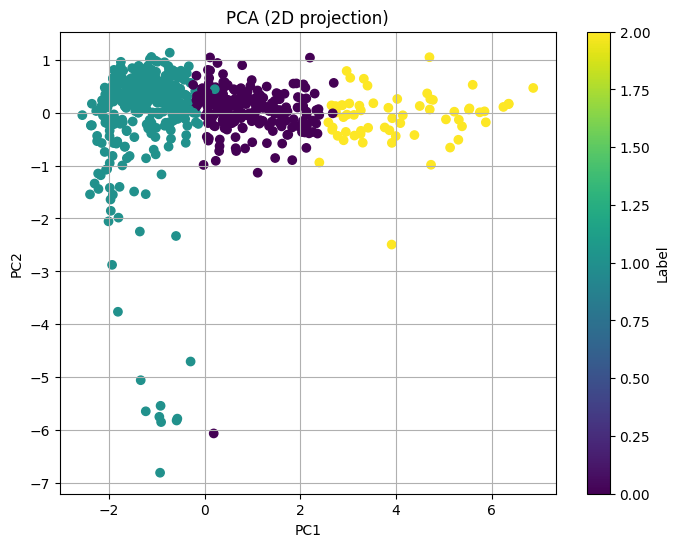

In [55]:
#Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (2D projection)')
plt.colorbar(label='Label')
plt.grid(True)
plt.show()

In [56]:
## 'features' => list of features names 
features = X.columns

#influence vectors (loadings)
loadings = pca.components_.T

#the greatest influence on PC1 and PC2
pc1_top_features = features[np.argsort(np.abs(loadings[:, 0]))[::-1][:3]]  #top 3 for  PC1
pc2_top_features = features[np.argsort(np.abs(loadings[:, 1]))[::-1][:3]]  #top 3 for PC2

print(f"The greatest influence on PC1: {pc1_top_features}")
print(f"The greatest influence on PC2: {pc2_top_features}")

The greatest influence on PC1: Index(['max_intensity', 'intensity_std', 'mean_intensity'], dtype='object')
The greatest influence on PC2: Index(['entropy', 'mean_intensity', 'intensity_std'], dtype='object')


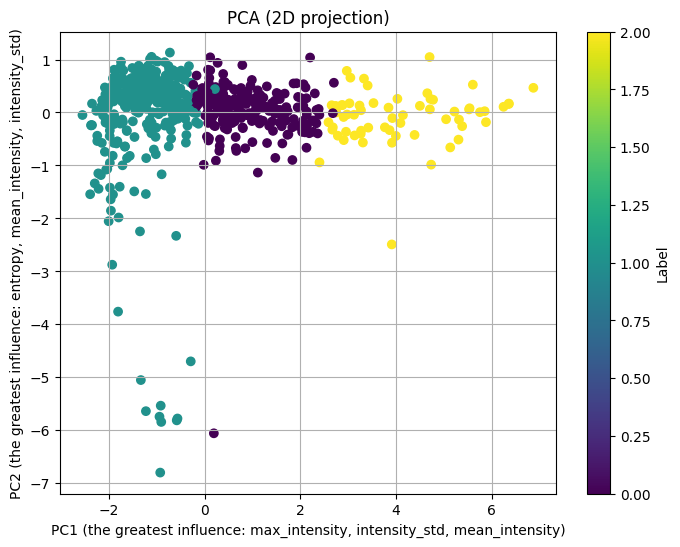

In [57]:
#Visualization
xlabel = f"PC1 (the greatest influence: {', '.join(pc1_top_features)})"
ylabel = f"PC2 (the greatest influence: {', '.join(pc2_top_features)})"

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('PCA (2D projection)')
plt.colorbar(label='Label')
plt.grid(True)
plt.show()

## LDA

In [58]:
#LDA
lda = LDA(n_components=2)
#lda_train = lda.fit_transform(X_train, y_train)
X_lda = lda.fit_transform(X_scaled, y)

In [59]:
features = X.columns
loadings = lda.scalings_ 
ld1_top_features = features[np.argsort(np.abs(loadings[:, 0]))[::-1][:3]]
ld2_top_features = features[np.argsort(np.abs(loadings[:, 1]))[::-1][:3]]

print(f"The greatest influence on LD1: {ld1_top_features}")
print(f"The greatest influence on LD2: {ld2_top_features}")

The greatest influence on LD1: Index(['max_intensity', 'intensity_std', 'mean_intensity'], dtype='object')
The greatest influence on LD2: Index(['max_intensity', 'volume_um3', 'intensity_std'], dtype='object')


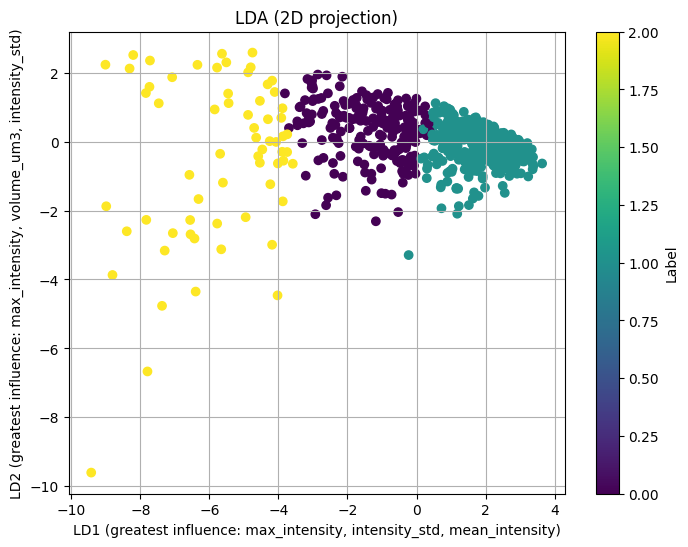

In [60]:
xlabel = f"LD1 (greatest influence: {', '.join(ld1_top_features)})"
ylabel = f"LD2 (greatest influence: {', '.join(ld2_top_features)})"

#Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('LDA (2D projection)')
plt.colorbar(label='Label')
plt.grid(True)
plt.show()

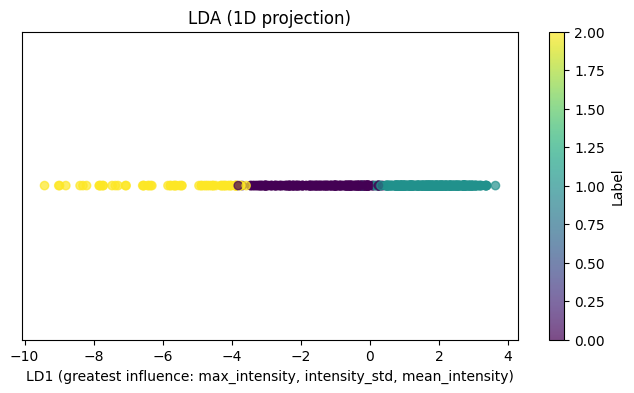

In [61]:
#1D LDA
lda = LDA(n_components=1)
X_lda_1d = lda.fit_transform(X_scaled, y)

features = X.columns
loadings = lda.scalings_  # shape (n_features, 1)
ld1_top_features = features[np.argsort(np.abs(loadings[:, 0]))[::-1][:3]]

xlabel = f"LD1 (greatest influence: {', '.join(ld1_top_features)})"

plt.figure(figsize=(8, 4))
y_positions = np.zeros_like(X_lda_1d)  
plt.scatter(X_lda_1d[:, 0], y_positions, c=y, cmap='viridis', alpha=0.7)
plt.xlabel(xlabel)
plt.yticks([])  # ukrywamy oś Y, bo jest nieistotna
plt.title('LDA (1D projection)')
plt.colorbar(label='Label')
#plt.grid(axis='x')
plt.show()

## K-Means visualization (based on the found principal compounds) 

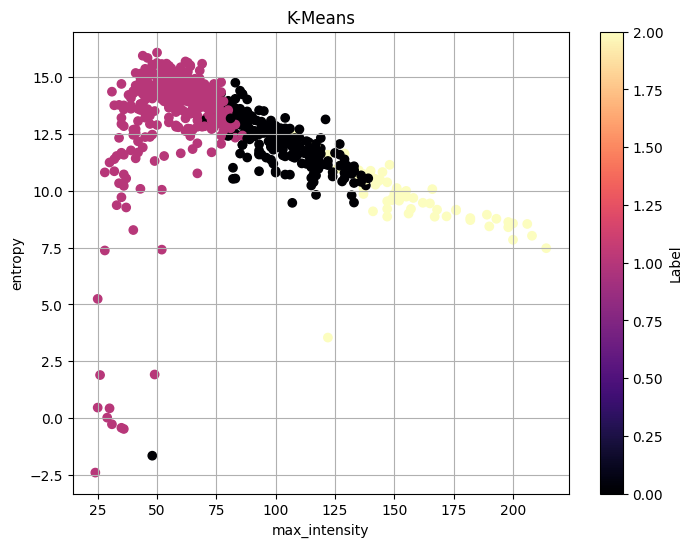

In [62]:
#Visualization
xlabel = "max_intensity"
ylabel = "entropy"

plt.figure(figsize=(8, 6))
plt.scatter(df["max_intensity"], df["entropy"], c=df['cluster'], cmap='magma')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("K-Means")
plt.colorbar(label='Label')
plt.grid(True)
plt.show()

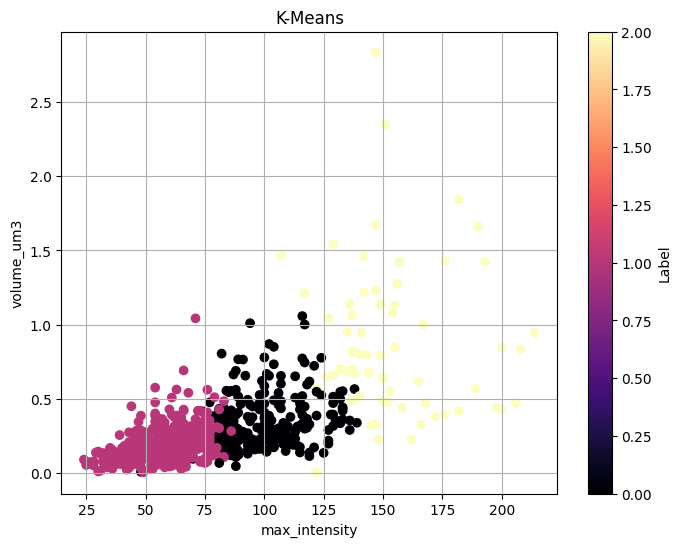

In [63]:
#Visualization
xlabel = "max_intensity"
ylabel = "volume_um3"

plt.figure(figsize=(8, 6))
plt.scatter(df["max_intensity"], df["volume_um3"], c=df['cluster'], cmap='magma')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("K-Means")
plt.colorbar(label='Label')
plt.grid(True)
plt.show()

### K-Means: screening

In [64]:
def run_kmeans_and_plot(df, cluster_range=(2, 6), save_dir="kmeans_plots"):
    #make sure directory exists
    os.makedirs(save_dir, exist_ok=True)

    for k in range(cluster_range[0], cluster_range[1]):
        #KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        df['cluster'] = kmeans.fit_predict(df[['max_intensity', 'entropy']])

        #Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df["max_intensity"], df["entropy"], c=df['cluster'], cmap='plasma')
        plt.xlabel("max_intensity")
        plt.ylabel("entropy")
        plt.title(f"K-Means (k={k})")
        plt.colorbar(label='Cluster')
        plt.grid(True)
        #Save the plot
        filename = os.path.join(save_dir, f'kmeans_k{k}_v1.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()

        #Plot 2
        plt.figure(figsize=(8, 6))
        plt.scatter(df["max_intensity"], df["volume_um3"], c=df['cluster'], cmap='plasma')
        plt.xlabel("max_intensity")
        plt.ylabel("volume_um3")
        plt.title(f"K-Means (k={k})")
        plt.colorbar(label='Cluster')
        plt.grid(True)
        #Save the plot
        filename = os.path.join(save_dir, f'kmeans_k{k}_v2.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()

        print(f"Plots saved as: {filename}")

In [65]:
def run_kmeans_and_plot(df, cluster_range=(2, 6), save_dir="kmeans_plots"):
    #make sure directory exists
    os.makedirs(save_dir, exist_ok=True)

    for k in range(cluster_range[0], cluster_range[1]):
        #KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        df['cluster'] = kmeans.fit_predict(df[['max_intensity', 'entropy']])
        
        output_csv = os.path.join(save_dir, f"kmeans_k{k}.csv")
        df.to_csv(output_csv, index=False)
        print(f"Saved CSV to: {output_csv}")

        #Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df["max_intensity"], df["entropy"], c=df['cluster'], cmap='plasma')
        plt.xlabel("max_intensity")
        plt.ylabel("entropy")
        plt.title(f"K-Means (k={k})")
        plt.colorbar(label='Cluster')
        plt.grid(True)
        #Save the plot
        filename = os.path.join(save_dir, f'kmeans_k{k}_v1.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()

        #Plot 2
        plt.figure(figsize=(8, 6))
        plt.scatter(df["max_intensity"], df["volume_um3"], c=df['cluster'], cmap='plasma')
        plt.xlabel("max_intensity")
        plt.ylabel("volume_um3")
        plt.title(f"K-Means (k={k})")
        plt.colorbar(label='Cluster')
        plt.grid(True)
        #Save the plot
        filename = os.path.join(save_dir, f'kmeans_k{k}_v2.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()

        print(f"Plots saved as: {filename}")

In [66]:
run_kmeans_and_plot(df, cluster_range=(2, 6), save_dir="./data/kmeans/SIII/Ch2") #name of the phase as the end of the directory 

Saved CSV to: ./data/kmeans/SIII/Ch2/kmeans_k2.csv
Plots saved as: ./data/kmeans/SIII/Ch2/kmeans_k2_v2.png
Saved CSV to: ./data/kmeans/SIII/Ch2/kmeans_k3.csv
Plots saved as: ./data/kmeans/SIII/Ch2/kmeans_k3_v2.png
Saved CSV to: ./data/kmeans/SIII/Ch2/kmeans_k4.csv
Plots saved as: ./data/kmeans/SIII/Ch2/kmeans_k4_v2.png
Saved CSV to: ./data/kmeans/SIII/Ch2/kmeans_k5.csv
Plots saved as: ./data/kmeans/SIII/Ch2/kmeans_k5_v2.png


## DBSCAN 

In [67]:
X = df[['volume_um3', 'mean_intensity', 'max_intensity', 'intensity_std', 'entropy']] #'total_intensity', 'background_corrected_intensity'
# Standardize
X_scaled = StandardScaler().fit_transform(X)

In [68]:
db = DBSCAN(eps=0.22, min_samples=5)
db.fit(X_scaled)

,eps,0.22
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [69]:
df["cluster_db"] = db.fit_predict(X_scaled)

/var/folders/ym/z9x51_9s1hdcl5x9hh6kgmwh0000gn/T/ipykernel_32239/699232592.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('magma')


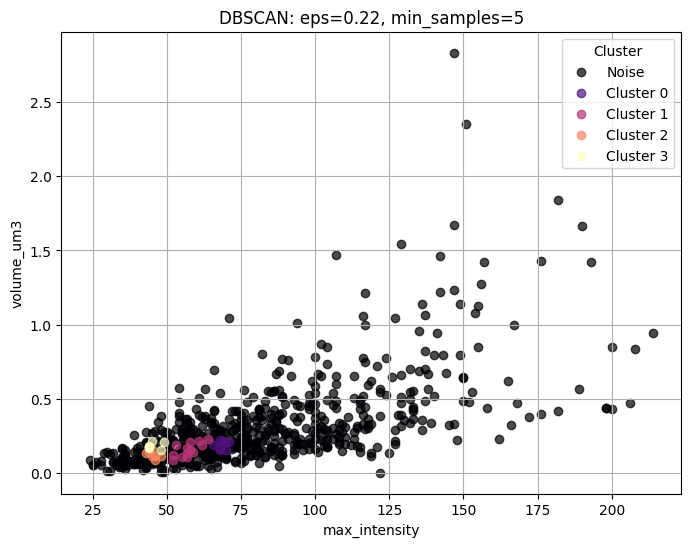

In [70]:
plt.figure(figsize=(8, 6))

xlabel = "max_intensity"
ylabel = "volume_um3"

clusters = np.unique(df['cluster_db'])
cmap = get_cmap('magma')
norm = plt.Normalize(vmin=min(clusters), vmax=max(clusters)) 

for cluster in clusters:
    cluster_data = df[df['cluster_db'] == cluster]
    color = cmap(norm(cluster)) 
    label = 'Noise' if cluster == -1 else f'Cluster {cluster}'
    plt.scatter(cluster_data["max_intensity"], cluster_data["volume_um3"],
                label=label, color=color, alpha=0.7)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("DBSCAN: eps=0.22, min_samples=5")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

/var/folders/ym/z9x51_9s1hdcl5x9hh6kgmwh0000gn/T/ipykernel_32239/141814160.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('magma')


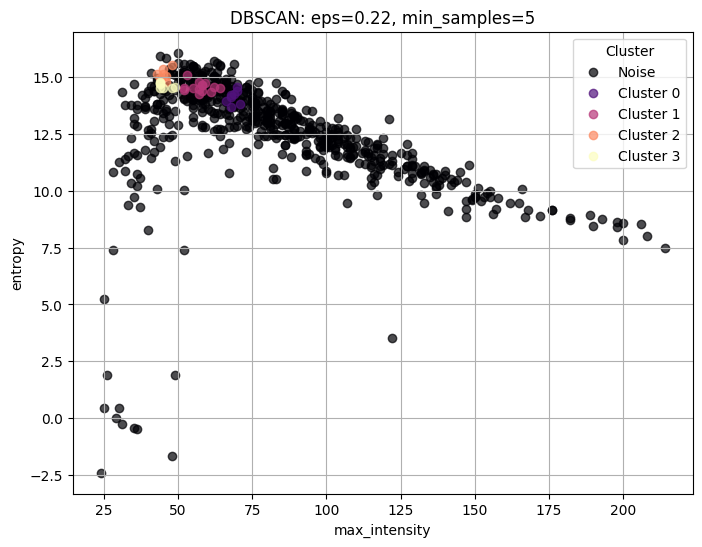

In [71]:
plt.figure(figsize=(8, 6))

xlabel = "max_intensity"
ylabel = "entropy"

clusters = np.unique(df['cluster_db'])
cmap = get_cmap('magma')
norm = plt.Normalize(vmin=min(clusters), vmax=max(clusters)) 

for cluster in clusters:
    cluster_data = df[df['cluster_db'] == cluster]
    color = cmap(norm(cluster)) 
    label = 'Noise' if cluster == -1 else f'Cluster {cluster}'
    plt.scatter(cluster_data["max_intensity"], cluster_data["entropy"],
                label=label, color=color, alpha=0.7)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("DBSCAN: eps=0.22, min_samples=5")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()